## Problem Description:

#### In India, How to find the best state to live in and in that state finding the best city for doing business with multiple business options

India is having huge population which is 2nd in the world. This gives numbers of opportunities to those who want to start a new business in India.
Someone from outside of India who want to stay and start a new businees in India will look after certain parameters to choose the best state to live. Three main paramters to consider are **Literacy rate**, **Crime rate** and per **Capita NSDP(Net state Domestic Product)**. Now not any single state will have highest literacy rate and Per capita NSDP along with lowest crime rate. So here we will use the Data Analysis methods to find the best state which has balances between all these three parameters.

After having the best state to live in we will find the best business options and in which city one of that businesses can be started to have the successful business.

## Data used to solve the problem:

##### 1. I have used following state wise (latest available) data from the "Wikipedia" to find the best state to live in.

* literacy Rate(2011): https://en.wikipedia.org/wiki/List_of_Indian_states_and_union_territories_by_literacy_rate
* Crime Rate(2018): https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_crime_rate
* Per Capita NSDP(2018): https://en.wikipedia.org/wiki/List_of_Indian_states_and_union_territories_by_GDP_per_capita

We will use these state wise data to make cluster of the state and one of that cluster will give the list of states which are best and has balanced paramters stated above.   

##### 2. I have used **FOUR SQUARE** API to retireve venues data to find the best business option and along with best business location.

Importing Important Libreries

In [39]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#Install **lxml** to read the web HTML files

#librery to standerdize the data for clustering
from sklearn.preprocessing import StandardScaler

#to print in color format
from termcolor import colored


print('Libraries imported.')


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.1
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Libraries imported.


Installing **lxml** to fetch the web HTML data

In [40]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


Following are the URLs for diffenrent data that we have used in this project

In [41]:
literacy_url= 'https://en.wikipedia.org/wiki/List_of_Indian_states_and_union_territories_by_literacy_rate'
crime_url='https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_crime_rate'
NSDP_url='https://en.wikipedia.org/wiki/List_of_Indian_states_and_union_territories_by_GDP_per_capita'

In [42]:
df_lit=pd.read_html(literacy_url)[1]
df_lit.columns=df_lit.iloc[0,:]
df_lit.drop(0, axis=0, inplace=True)
df_lit=df_lit[['States/Union', 2011.0]]
df_lit.columns=['State/UT', 'Litercay Rate %']

df_lit.head()

,State/UT,Litercay Rate %
1,Kerala,99.41
2,Lakshadweep,92.28
3,Mizoram,91.58
4,Tripura,87.75
5,Goa,87.40


Fethcing and cleaning the statewise Crime data

In [43]:
df_crime=pd.read_html(crime_url)[0]
df_crime=df_crime[['State/UT','Rate of cognizable crimes (IPC+SLL)(2018)']].drop(0, axis=0)
df_crime.columns=['State/UT','Rate of crimes']

df_crime.head()

,State/UT,Rate of crimes
1,Andhra Pradesh,278.1
2,Arunachal Pradesh,188.7
3,Assam,354.2
4,Bihar,222.1
5,Chhattisgarh,345.1


Fethcing and cleaning the statewise NSDP(*Net State Domestic Product*) data

In [44]:
df_NSDP=pd.read_html(NSDP_url)[2]
df_NSDP=df_NSDP[['State/Union territory','NSDP Per Capita (Nominal)(2018–19)[1][2]']]
df_NSDP.columns=['State/UT', 'Per Capita NSDP(₹)']

df_NSDP.dropna(axis=0, inplace=True)

df_NSDP['Per Capita NSDP(₹)']=df_NSDP['Per Capita NSDP(₹)'].str.replace('(\D+)','').astype(int)


df_NSDP=df_NSDP.replace('Maharastra', 'Maharashtra')
df_NSDP.loc[12,'Per Capita NSDP(₹)'] = 191736

df_NSDP


,State/UT,Per Capita NSDP(₹)
0,Goa,430081
1,Sikkim,380926
2,Delhi,358430
3,Chandigarh,320300
4,Haryana,236147
5,Puducherry,220461
6,Karnataka,212477
7,Telangana,204488
8,Kerala,204105
9,Uttarakhand,198738


Merging all the data into one table

In [45]:
df=pd.merge(df_crime, df_lit, on='State/UT')
df=pd.merge(df, df_NSDP, on='State/UT')
df=df.set_index('State/UT')

df

,Rate of crimes,Litercay Rate %,Per Capita NSDP(₹)
State/UT,,,
Andhra Pradesh,278.1,67.66,151173
Arunachal Pradesh,188.7,66.95,139588
Assam,354.2,73.18,82837
Bihar,222.1,63.82,40982
Chhattisgarh,345.1,71.04,92413
Delhi,1342.5,86.34,358430
Goa,253.2,87.40,430081
Gujarat,584.1,79.31,195845
Haryana,673.3,76.64,236147


#### let's visualize **State Vs. Literacy Rate %**   

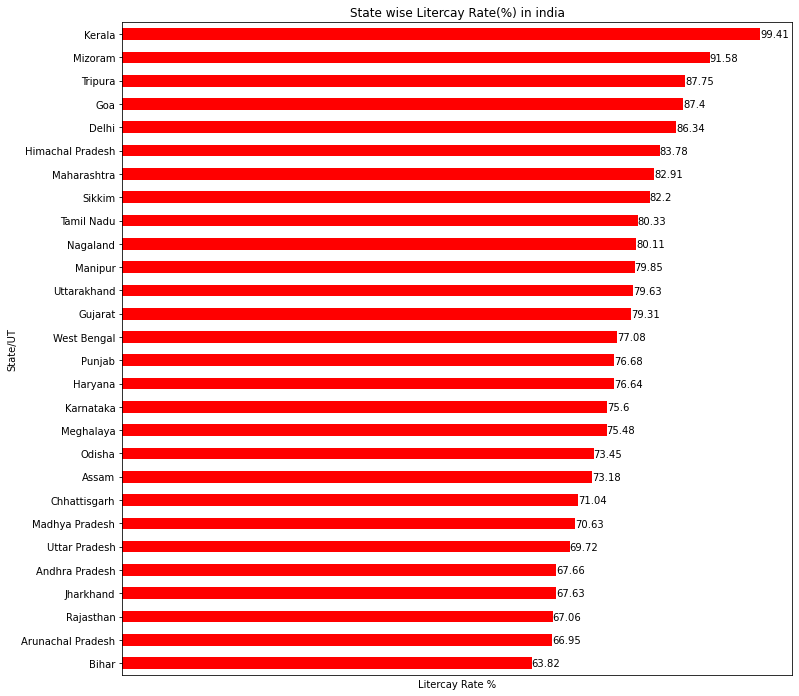

In [46]:
dflit=df.sort_values(by='Litercay Rate %', ascending=True)
dflit=dflit['Litercay Rate %']

xmin=df['Litercay Rate %'].min()
xmax=df['Litercay Rate %'].max()

dflit.plot(kind='barh', figsize=(12,12), xticks=[], color='red')

plt.title('State wise Litercay Rate(%) in india')
plt.xlabel('Litercay Rate %')


for index, value in enumerate(dflit):
    label=format(value,',')
    plt.annotate(label, xy=(value, index-0.15), color='black')

   *Here we can see that **Kerala** is highly literate state while **Bihar** is less literate state*.

#### Now let's visualize **State Vs. Rate of crimes**   

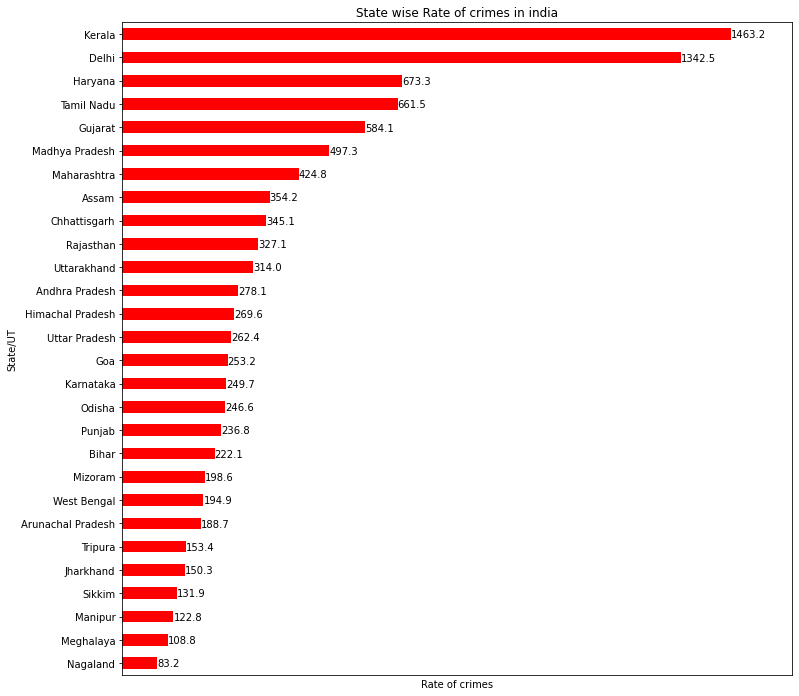

In [47]:
dfcrime=df.sort_values(by='Rate of crimes', ascending=True)
dfcrime=dfcrime['Rate of crimes']

xmin=df['Rate of crimes'].min()
xmax=df['Rate of crimes'].max()

dfcrime.plot(kind='barh', figsize=(12,12),color='red', xticks=[], xlim=(0, xmax*11/10))

plt.title('State wise Rate of crimes in india')
plt.xlabel('Rate of crimes')


for index, value in enumerate(dfcrime):
    label=value
    plt.annotate(label, xy=(value, index-0.15), color='black')

*Here we can see that **Kerala** is having highest crime rate while **Nagaland** is having lowest crime rate*.

#### Now let's visualize **State Vs. NSDP**   

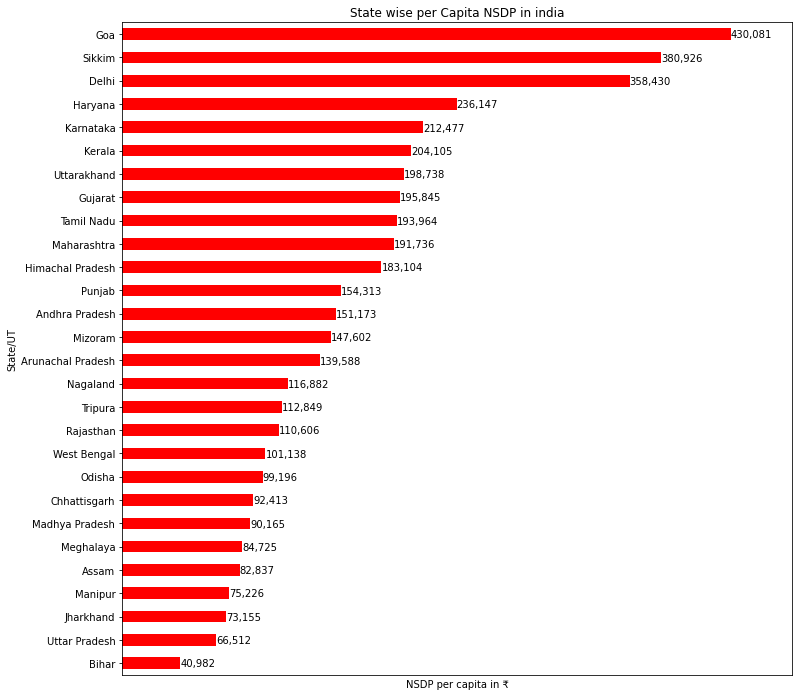

In [48]:
dfNSDP=df.sort_values(by='Per Capita NSDP(₹)', ascending=True)
dfNSDP=dfNSDP['Per Capita NSDP(₹)']

xmin=df['Per Capita NSDP(₹)'].min()
xmax=df['Per Capita NSDP(₹)'].max()

dfNSDP.plot(kind='barh', figsize=(12,12),color='red', xlim=(0, xmax*11/10), xticks=[])

plt.title('State wise per Capita NSDP in india')
plt.xlabel('NSDP per capita in ₹')


for index, value in enumerate(dfNSDP):
    label=format(value,',')
    plt.annotate(label, xy=(value, index-0.15), color='black')

*Here we can see that **Goa** is having highest per Capita NSDP while **Bihar** is having lowest per Capita NSDP*.

## Now let's make clusters of the states to identify which states is having balance between all these three parameters.

#### To make clusters of the states according to this parameters. let's first find the optimal number of cluster using Elbow method.

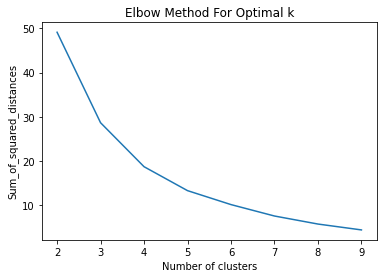

In [49]:
x=df.values
x=StandardScaler().fit_transform(x)

NumOfClus=range(2,10)
Sum_of_squared_distances = []

for k in NumOfClus:
    k_means=KMeans(n_clusters=k)
    k_means.fit(x)
    Sum_of_squared_distances.append(k_means.inertia_)

plt.plot(NumOfClus, Sum_of_squared_distances)
plt.xlabel('Number of clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Here in the chart above we can see elbow point becomes at the **4** number of clusters. 

### So let's make 4 cluster of the states to see how states are clustered according to these three parameters. 

In [50]:
k_means=KMeans(n_clusters=4)
k_means.fit(x)
labels=k_means.labels_

df['clusterLabel']=labels

**Let's visulalize the states into map of India according to their cluster lables.**

We will first fetch the *Lattitudes* and *Longitude* of the each state

In [51]:
latt=dict()
long=dict()

for state in df.index:
    address=str(state + ', India')
    geolocator=Nominatim(user_agent="ny_explorer")
    location=geolocator.geocode(address)
    latitude=location.latitude
    longitude=location.longitude
    latt[state]=latitude
    long[state]=longitude
    

geostates={'Latitudes':latt, 'Longitudes':long}

dfgeostates=pd.DataFrame(geostates)

Merging this geolations with our main dataframe

In [52]:
dfs=pd.merge(df,dfgeostates, on=df.index)

dfs.rename(columns={'key_0':'State'}, inplace=True)

dfs.sort_values(['clusterLabel'], inplace=True)

dfs.head()

,State,Rate of crimes,Litercay Rate %,Per Capita NSDP(₹),clusterLabel,Latitudes,Longitudes
0,Andhra Pradesh,278.1,67.66,151173,0,15.924091,80.186381
25,Uttar Pradesh,262.4,69.72,66512,0,27.130334,80.859666
21,Rajasthan,327.1,67.06,110606,0,26.810578,73.768455
19,Odisha,246.6,73.45,99196,0,20.543124,84.689732
16,Meghalaya,108.8,75.48,84725,0,25.537943,91.299910


**Now let's visualize states accroding to their cluster label to see how clusters are relating to geograhical location of the states.**

In [53]:
address = 'India, IN'

geolocator=Nominatim(user_agent="IN_explorer")
location=geolocator.geocode(address)
INlatitude=location.latitude
INlongitude=location.longitude

print('The geograpical coordinate of India is {}, {}.'.format(INlatitude, INlongitude))

The geograpical coordinate of India is 22.3511148, 78.6677428.


In [54]:
# create map of New York using latitude and longitude values
map_India = folium.Map(location=[INlatitude, INlongitude], zoom_start=5)
clr=['red', 'blue', 'yellow', 'green', 'black']
# add markers to map
for lat, lng, cn in zip(dfs['Latitudes'], dfs['Longitudes'],dfs['clusterLabel']):
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        color=clr[cn],
        fill=True,
        fill_color=clr[cn],
        fill_opacity=0.7,
        ).add_to(map_India)

map_India

*Here we can see states in same clusters are not related to each other that much with respect to geographic location of each states.*

We can find the centroid of the clusters by taking mean value of each paramter grouped by cluster label. On the basis of the centroid values we can differentiate between the clusters.

In [55]:
dfclus=df.groupby('clusterLabel').mean().round(2)
dfclus

,Rate of crimes,Litercay Rate %,Per Capita NSDP(₹)
clusterLabel,,,
0,253.72,71.04,92901.23
1,192.55,84.80,405503.50
2,349.91,81.30,176696.09
3,1402.85,92.88,281267.50


Let's standardize the value of the cluster means with their maximum values to have better comparison among clusters

In [56]:
dfclus['Litercay Rate %']=dfclus['Litercay Rate %']/dfclus['Litercay Rate %'].max()
dfclus['Rate of crimes']=dfclus['Rate of crimes']/dfclus['Rate of crimes'].max()
dfclus['Per Capita NSDP(₹)']=dfclus['Per Capita NSDP(₹)']/dfclus['Per Capita NSDP(₹)'].max()

dfclus=dfclus.round(2)

dfclus

,Rate of crimes,Litercay Rate %,Per Capita NSDP(₹)
clusterLabel,,,
0,0.18,0.76,0.23
1,0.14,0.91,1.00
2,0.25,0.88,0.44
3,1.00,1.00,0.69


*As can be seen in above centroid values maximum **Per Capita NSDP(₹)** lies in cluster **3**, maximum **Litercay Rate %** lies in cluster **0** while lowest **Rate of crimes** lies in cluster **3**.* 

So to find the relatively best cluster which balances between all three paramters we define a score which multiplies the positive parametrs (*Litercay Rate % & Per Capita NSDP(₹)*) and divides the result with the negative parameters (*Rate of crimes*)


To find the best cluster we do following:

**Score = (Per Capita NSDP(₹) * Litercay Rate %) / Rate of crimes**

In [57]:
dfclus['Score']=(dfclus['Per Capita NSDP(₹)']*dfclus['Litercay Rate %']/dfclus['Rate of crimes']).round(2)
dfclus.sort_values(['Score'], ascending=False, inplace=True)
dfclus

,Rate of crimes,Litercay Rate %,Per Capita NSDP(₹),Score
clusterLabel,,,,
1,0.14,0.91,1.00,6.50
2,0.25,0.88,0.44,1.55
0,0.18,0.76,0.23,0.97
3,1.00,1.00,0.69,0.69


Here we find best and worst cluster.

In [58]:
dfBest=df[df['clusterLabel']==dfclus.index[0]]
dfWorst=df[df['clusterLabel']==dfclus.index[-1]]

dfWorst

,Rate of crimes,Litercay Rate %,Per Capita NSDP(₹),clusterLabel
State/UT,,,,
Delhi,1342.5,86.34,358430,3
Kerala,1463.2,99.41,204105,3


*Here we find two worst states **Delhi** & **Kerala** to live in. Both states are having high rate of literacy and High NSDP but at the same time both states are having high rate of crimes which makes them states not to choose to live in.*

In [59]:
dfBest

,Rate of crimes,Litercay Rate %,Per Capita NSDP(₹),clusterLabel
State/UT,,,,
Goa,253.2,87.4,430081,1
Sikkim,131.9,82.2,380926,1


*Here we find two best states **Goa** & **Sikkim** to live in which balances between all those three paramters.*  
One can choose between these two states to live there and start a new business.  
Let's assume that our client chooses **Goa**

# 2. Exploring Neighbourhoods and Venues in Goa State

### Now Using **FOUR SQUARE** API, we will explore Neighbourhoods and venus in GOA state to find the best bussiness category and the  best location for that business so that business can be more profitable

We find the geolocation data of the **Goa**

In [60]:
address = 'goa, IN'

geolocator=Nominatim(user_agent="ny_explorer")
location=geolocator.geocode(address)
latgoa=location.latitude
lnggoa=location.longitude

print('The geograpical coordinate of Goa is {}, {}.'.format(latgoa, lnggoa))

The geograpical coordinate of Goa is 15.3004543, 74.0855134.


Foursquare Credentials:

In [61]:
CLIENT_ID = '40XAM2ZFVUUJEPPJ0H4432IUGJKWZRNTHYIDS2JGXOTFQ2BO'
CLIENT_SECRET = 'TVUPSPZCCBTGO4CYNQMMU3LJ1OZK4USNIERC04BF2LGWCZVM'
VERSION = '20180605'
radius=50000
LIMIT=100


Creating URL for exploring the Venues in Goa State.

In [62]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latgoa, lnggoa, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=40XAM2ZFVUUJEPPJ0H4432IUGJKWZRNTHYIDS2JGXOTFQ2BO&client_secret=TVUPSPZCCBTGO4CYNQMMU3LJ1OZK4USNIERC04BF2LGWCZVM&ll=15.3004543,74.0855134&v=20180605&radius=50000&limit=100'

Fetching the JSON data from FOURSQUARE

In [63]:
results=requests.get(url).json()
venues=results['response']['groups'][0]['items']
venues=pd.json_normalize(venues)

In [64]:
venues.shape

(100, 21)

100 venues are returned by FOURSQUARE

In [65]:
venues.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.crossStreet,venue.location.postalCode,venue.venuePage.id
0,e-0-4bc1831fb492d13a6639a660-0,0,"[{'summary': 'This spot is popular', 'type': '...",4bc1831fb492d13a6639a660,Chef Fernando's Nostalgia,Raia Salcette,15.319265,73.983901,"[{'label': 'display', 'lat': 15.31926467121023...",11109,IN,Marmagao,Goa,India,"[Raia Salcette, Marmagao, Goa, India]","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],NaN,NaN,NaN
1,e-0-4e9ee61edab4b02e6528ab6b-1,0,"[{'summary': 'This spot is popular', 'type': '...",4e9ee61edab4b02e6528ab6b,Benaulim Beach,NaN,15.257210,73.919767,"[{'label': 'display', 'lat': 15.25720971231366...",18438,IN,Benaulim,Goa,India,"[Benaulim, Goa, India]","[{'id': '4bf58dd8d48988d1e2941735', 'name': 'B...",0,[],NaN,NaN,NaN
2,e-0-4d21a1735c4ca1cd4807ab3d-2,0,"[{'summary': 'This spot is popular', 'type': '...",4d21a1735c4ca1cd4807ab3d,Varca Beach,NaN,15.226093,73.929337,"[{'label': 'display', 'lat': 15.22609339784299...",18703,IN,Varca,Goa,India,"[Varca, Goa, India]","[{'id': '4bf58dd8d48988d165941735', 'name': 'S...",0,[],NaN,NaN,NaN
3,e-0-4b996ba1f964a520347a35e3-3,0,"[{'summary': 'This spot is popular', 'type': '...",4b996ba1f964a520347a35e3,Martin's Corner,NaN,15.303782,73.914276,"[{'label': 'display', 'lat': 15.30378188652030...",18389,IN,NaN,Goa,India,"[Goa, India]","[{'id': '4bf58dd8d48988d1ce941735', 'name': 'S...",0,[],NaN,NaN,NaN
4,e-0-4d738c6aec075481a17e98bf-4,0,"[{'summary': 'This spot is popular', 'type': '...",4d738c6aec075481a17e98bf,Punjab Sind Dairy,Durham Apartments,15.271994,73.956903,"[{'label': 'display', 'lat': 15.27199444295706...",14168,IN,Madgaon,Goa,India,"[Durham Apartments (Luis Miranda Road), Madgao...","[{'id': '4bf58dd8d48988d1d0941735', 'name': 'D...",0,[],Luis Miranda Road,NaN,NaN


Filtering the required columns.

In [66]:
columns=['venue.name', 'venue.location.lat', 'venue.location.lng', 'venue.location.city', 'venue.categories']

goa_venues= venues.loc[:, columns]
goa_venues.columns=[col.split('.')[-1] for col in goa_venues.columns]
goa_venues.head()

,name,lat,lng,city,categories
0,Chef Fernando's Nostalgia,15.319265,73.983901,Marmagao,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I..."
1,Benaulim Beach,15.257210,73.919767,Benaulim,"[{'id': '4bf58dd8d48988d1e2941735', 'name': 'B..."
2,Varca Beach,15.226093,73.929337,Varca,"[{'id': '4bf58dd8d48988d165941735', 'name': 'S..."
3,Martin's Corner,15.303782,73.914276,NaN,"[{'id': '4bf58dd8d48988d1ce941735', 'name': 'S..."
4,Punjab Sind Dairy,15.271994,73.956903,Madgaon,"[{'id': '4bf58dd8d48988d1d0941735', 'name': 'D..."


Fetching the only category names.

In [67]:
for n in range(goa_venues.shape[0]):
    goa_venues.loc[n,'categories' ]=goa_venues['categories'][n][0]['name']

goa_venues.head()

,name,lat,lng,city,categories
0,Chef Fernando's Nostalgia,15.319265,73.983901,Marmagao,Indian Restaurant
1,Benaulim Beach,15.257210,73.919767,Benaulim,Beach
2,Varca Beach,15.226093,73.929337,Varca,Scenic Lookout
3,Martin's Corner,15.303782,73.914276,NaN,Seafood Restaurant
4,Punjab Sind Dairy,15.271994,73.956903,Madgaon,Dessert Shop


Making the list of Cities in GOA

In [68]:
goa_cities=goa_venues['city'].unique()

goa_cities=[x for x in goa_cities if x==x and x!='Goa']
len(goa_cities)

23

*There are 23 cities returned by API*

Fetching the geographical cordinates of each cities

In [69]:
latt=dict()
long=dict()
for city in goa_cities:
    try:
        address= str(city+', goa')
        geolocator=Nominatim(user_agent="ny_explorer")
        location=geolocator.geocode(address)
        latitude=location.latitude
    except: continue
    longitude=location.longitude
    latt[city]=latitude
    long[city]=longitude
    
geocity={'Latitudes':latt, 'Longitudes':long}

dfgoacity=pd.DataFrame(geocity)
dfgoacity.head()

,Latitudes,Longitudes
Benaulim,15.260137,73.927567
Varca,15.231419,73.943265
Madgaon,15.292580,73.961694
Salcete,15.255966,73.988184
Cavelossim,15.184562,73.945631


In [70]:
dfgoacity.reset_index(inplace=True)

dfgoacity.columns=['City','Latitudes','Longitudes']
dfgoacity.head()

,City,Latitudes,Longitudes
0,Benaulim,15.260137,73.927567
1,Varca,15.231419,73.943265
2,Madgaon,15.292580,73.961694
3,Salcete,15.255966,73.988184
4,Cavelossim,15.184562,73.945631


Let's Visualize these cities in map of Goa

In [71]:
map_goa = folium.Map(location=[latgoa, lnggoa], zoom_start=10)

for lat, lng in zip(dfgoacity['Latitudes'], dfgoacity['Longitudes']):
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        color='red',
        fill=False,
        ).add_to(map_goa)

map_goa

Setting the limit for Venues to fetch from API

In [72]:
Limit=100

Fetchig the venues for each cities..

In [73]:
venues_list=[]
for City, lat, lng in zip(dfgoacity['City'], dfgoacity['Latitudes'], dfgoacity['Longitudes']):
            
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat, 
    lng, 
    radius, 
    LIMIT)
            
    results = requests.get(url).json()["response"]['groups'][0]['items']
        

    venues_list.append([(
            City, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

Goa_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
Goa_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    


Goa_venues.head()

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Benaulim,15.260137,73.927567,Benaulim Beach,15.257210,73.919767,Beach
1,Benaulim,15.260137,73.927567,Varca Beach,15.226093,73.929337,Scenic Lookout
2,Benaulim,15.260137,73.927567,Sernabatim Beach,15.263597,73.917281,Beach
3,Benaulim,15.260137,73.927567,Taj Exotica Hotel Benaulim,15.244224,73.924882,Resort
4,Benaulim,15.260137,73.927567,Martin's Corner,15.303782,73.914276,Seafood Restaurant


Let's check how many venues were returned for each neighborhood

In [74]:
Goa_venues.groupby('City').count()

,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
Agonda,100,100,100,100,100,100
Anjuna,57,57,57,57,57,57
Bambolim,82,82,82,82,82,82
Bardez,67,67,67,67,67,67
Benaulim,100,100,100,100,100,100
Betalbatim,100,100,100,100,100,100
Candolim,75,75,75,75,75,75
Cavelossim,100,100,100,100,100,100
Colva,100,100,100,100,100,100


#### Let's find out how many unique categories can be curated from all the returned venues

In [75]:
print('There are {} uniques categories.'.format(len(Goa_venues['Venue Category'].unique())))

There are 55 uniques categories.


Now to find the best business location and categry we will first delete the venues which are not businesses.

In [76]:
Goa_venues=Goa_venues[Goa_venues['Venue Category']!='Beach']
Goa_venues=Goa_venues[Goa_venues['Venue Category']!='Train Station']
Goa_venues=Goa_venues[Goa_venues['Venue Category']!='Zoo']
Goa_venues=Goa_venues[Goa_venues['Venue Category']!='Mountain']
Goa_venues=Goa_venues[Goa_venues['Venue Category']!='Harbor / Marina']
Goa_venues=Goa_venues[Goa_venues['Venue Category']!='Zoo Exhibit']

Let's do One-hot Encoding

In [77]:
Goa_venues_Category = pd.get_dummies(Goa_venues[['Venue Category']], prefix="", prefix_sep="")
Goa_venues_Category.head()

,American Restaurant,Asian Restaurant,BBQ Joint,Bar,Bistro,Brazilian Restaurant,Breakfast Spot,Burger Joint,Café,Caribbean Restaurant,Casino,Chinese Restaurant,Coffee Shop,Convenience Store,Deli / Bodega,Dessert Shop,Eastern European Restaurant,Farm,Fish & Chips Shop,Food,Food Court,French Restaurant,Gastropub,Goan Restaurant,Greek Restaurant,Grocery Store,Historic Site,Hostel,Hotel,Hotel Bar,Indian Restaurant,Italian Restaurant,Jazz Club,Juice Bar,Lounge,Mediterranean Restaurant,Motel,Mughlai Restaurant,Nightclub,Pool,Portuguese Restaurant,Pub,Resort,Rest Area,Restaurant,Scenic Lookout,Seafood Restaurant,Spa,Swiss Restaurant,Vegetarian / Vegan Restaurant
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [78]:
Goa_venues_Category.insert(0, 'City', Goa_venues['City'] )

Goa_venues_Category.head()

,City,American Restaurant,Asian Restaurant,BBQ Joint,Bar,Bistro,Brazilian Restaurant,Breakfast Spot,Burger Joint,Café,Caribbean Restaurant,Casino,Chinese Restaurant,Coffee Shop,Convenience Store,Deli / Bodega,Dessert Shop,Eastern European Restaurant,Farm,Fish & Chips Shop,Food,Food Court,French Restaurant,Gastropub,Goan Restaurant,Greek Restaurant,Grocery Store,Historic Site,Hostel,Hotel,Hotel Bar,Indian Restaurant,Italian Restaurant,Jazz Club,Juice Bar,Lounge,Mediterranean Restaurant,Motel,Mughlai Restaurant,Nightclub,Pool,Portuguese Restaurant,Pub,Resort,Rest Area,Restaurant,Scenic Lookout,Seafood Restaurant,Spa,Swiss Restaurant,Vegetarian / Vegan Restaurant
1,Benaulim,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Benaulim,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Benaulim,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,Benaulim,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Benaulim,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


#### Next, let's group rows by City and by taking the mean of the frequency of occurrence of each category

In [79]:
Goa_Categories=Goa_venues_Category.groupby('City').mean()

Goa_Categories=Goa_Categories.T

Goa_Categories.head()

City,Agonda,Anjuna,Bambolim,Bardez,Benaulim,Betalbatim,Candolim,Cavelossim,Colva,Madgaon,Old Goa,Palolem,Panjim,Ponda,Salcete,Varca
American Restaurant,0.000000,0.021739,0.015385,0.018868,0.011765,0.011765,0.015873,0.011765,0.011765,0.011765,0.017241,0.000000,0.014493,0.011236,0.011765,0.011765
Asian Restaurant,0.023529,0.000000,0.000000,0.000000,0.023529,0.023529,0.000000,0.023529,0.023529,0.023529,0.000000,0.024390,0.000000,0.022472,0.023529,0.023529
BBQ Joint,0.011765,0.000000,0.000000,0.000000,0.011765,0.023529,0.000000,0.011765,0.011765,0.023529,0.000000,0.012195,0.000000,0.022472,0.011765,0.011765
Bar,0.035294,0.021739,0.015385,0.018868,0.023529,0.023529,0.015873,0.035294,0.023529,0.023529,0.017241,0.024390,0.014493,0.022472,0.023529,0.023529
Bistro,0.011765,0.021739,0.030769,0.018868,0.023529,0.011765,0.015873,0.023529,0.011765,0.023529,0.017241,0.012195,0.014493,0.011236,0.023529,0.023529


Let's frame the categories in each city accroding to its mean occuring values in the ascending order. 

In [80]:
Goa_Categories1=pd.DataFrame()
for col in Goa_Categories.columns:
    df1=pd.DataFrame()
    df1=Goa_Categories[[col]].sort_values([col], ascending=True, axis=0)
    Goa_Categories1[col]=df1.index


Let's fetch the 10 least frequent businesses in each city.

In [81]:
Goa_Categories1.head(10)

,Agonda,Anjuna,Bambolim,Bardez,Benaulim,Betalbatim,Candolim,Cavelossim,Colva,Madgaon,Old Goa,Palolem,Panjim,Ponda,Salcete,Varca
0,American Restaurant,Vegetarian / Vegan Restaurant,Grocery Store,Vegetarian / Vegan Restaurant,Greek Restaurant,Juice Bar,Vegetarian / Vegan Restaurant,Greek Restaurant,Juice Bar,Lounge,Vegetarian / Vegan Restaurant,American Restaurant,Vegetarian / Vegan Restaurant,Hotel Bar,Greek Restaurant,Greek Restaurant
1,Portuguese Restaurant,Swiss Restaurant,Food Court,Swiss Restaurant,Swiss Restaurant,Rest Area,Gastropub,Fish & Chips Shop,Rest Area,Rest Area,Gastropub,Portuguese Restaurant,Food Court,Deli / Bodega,Fish & Chips Shop,Fish & Chips Shop
2,Nightclub,Jazz Club,Deli / Bodega,Hotel Bar,Hostel,Swiss Restaurant,Food Court,Historic Site,Nightclub,Swiss Restaurant,Hotel Bar,Nightclub,Food,Motel,Hostel,Hostel
3,Mughlai Restaurant,Gastropub,Convenience Store,Gastropub,Hotel Bar,Brazilian Restaurant,Food,Hostel,Swiss Restaurant,Nightclub,Food Court,Mughlai Restaurant,Grocery Store,Lounge,Hotel Bar,Hotel Bar
4,Lounge,Food Court,Swiss Restaurant,Food Court,Convenience Store,Breakfast Spot,Farm,Convenience Store,Brazilian Restaurant,Brazilian Restaurant,Food,Motel,Eastern European Restaurant,Breakfast Spot,Convenience Store,Convenience Store
5,Juice Bar,Food,Chinese Restaurant,Food,Juice Bar,Motel,Eastern European Restaurant,Juice Bar,Breakfast Spot,Breakfast Spot,Eastern European Restaurant,Lounge,Deli / Bodega,Juice Bar,Juice Bar,Juice Bar
6,Hostel,Farm,Motel,Farm,Motel,Deli / Bodega,Hotel Bar,Swiss Restaurant,Motel,Motel,Deli / Bodega,Juice Bar,Hotel Bar,Swiss Restaurant,Swiss Restaurant,Swiss Restaurant
7,Historic Site,Eastern European Restaurant,Caribbean Restaurant,Eastern European Restaurant,Lounge,Convenience Store,Deli / Bodega,Motel,Convenience Store,Hostel,Convenience Store,Hostel,Swiss Restaurant,Hostel,Motel,Motel
8,French Restaurant,Deli / Bodega,Mughlai Restaurant,Deli / Bodega,Breakfast Spot,Hostel,Grocery Store,Lounge,Hotel Bar,Juice Bar,Swiss Restaurant,Historic Site,Caribbean Restaurant,French Restaurant,Lounge,Lounge
9,Food Court,Grocery Store,Pool,Grocery Store,Brazilian Restaurant,Hotel Bar,Chinese Restaurant,Burger Joint,Hostel,Convenience Store,Chinese Restaurant,French Restaurant,Chinese Restaurant,Gastropub,Burger Joint,Burger Joint


In [82]:
num=['1st', '2nd', '3rd']
ind=[]

for n in range(10):
    if n < 3:
        x=num[n]+' less freq.'
        ind.append(x)
    else:
        x=format(str(n+1)+'th less freq.')
        ind.append(x)
    
Goa_Categories2=Goa_Categories1.head(10).T

Goa_Categories2.columns=ind
Goa_Categories2

,1st less freq.,2nd less freq.,3rd less freq.,4th less freq.,5th less freq.,6th less freq.,7th less freq.,8th less freq.,9th less freq.,10th less freq.
Agonda,American Restaurant,Portuguese Restaurant,Nightclub,Mughlai Restaurant,Lounge,Juice Bar,Hostel,Historic Site,French Restaurant,Food Court
Anjuna,Vegetarian / Vegan Restaurant,Swiss Restaurant,Jazz Club,Gastropub,Food Court,Food,Farm,Eastern European Restaurant,Deli / Bodega,Grocery Store
Bambolim,Grocery Store,Food Court,Deli / Bodega,Convenience Store,Swiss Restaurant,Chinese Restaurant,Motel,Caribbean Restaurant,Mughlai Restaurant,Pool
Bardez,Vegetarian / Vegan Restaurant,Swiss Restaurant,Hotel Bar,Gastropub,Food Court,Food,Farm,Eastern European Restaurant,Deli / Bodega,Grocery Store
Benaulim,Greek Restaurant,Swiss Restaurant,Hostel,Hotel Bar,Convenience Store,Juice Bar,Motel,Lounge,Breakfast Spot,Brazilian Restaurant
Betalbatim,Juice Bar,Rest Area,Swiss Restaurant,Brazilian Restaurant,Breakfast Spot,Motel,Deli / Bodega,Convenience Store,Hostel,Hotel Bar
Candolim,Vegetarian / Vegan Restaurant,Gastropub,Food Court,Food,Farm,Eastern European Restaurant,Hotel Bar,Deli / Bodega,Grocery Store,Chinese Restaurant
Cavelossim,Greek Restaurant,Fish & Chips Shop,Historic Site,Hostel,Convenience Store,Juice Bar,Swiss Restaurant,Motel,Lounge,Burger Joint
Colva,Juice Bar,Rest Area,Nightclub,Swiss Restaurant,Brazilian Restaurant,Breakfast Spot,Motel,Convenience Store,Hotel Bar,Hostel
Madgaon,Lounge,Rest Area,Swiss Restaurant,Nightclub,Brazilian Restaurant,Breakfast Spot,Motel,Hostel,Juice Bar,Convenience Store


Let's find the most frequent category at every position which would be likely most profitable bussiness as it would be also abscent in nearby citie also.

In [83]:
Category_freq=Goa_Categories2.describe()

Category_freq=Category_freq.loc['top':,:]
Category_freq

,1st less freq.,2nd less freq.,3rd less freq.,4th less freq.,5th less freq.,6th less freq.,7th less freq.,8th less freq.,9th less freq.,10th less freq.
top,Vegetarian / Vegan Restaurant,Swiss Restaurant,Nightclub,Hotel Bar,Convenience Store,Juice Bar,Swiss Restaurant,Convenience Store,Lounge,Chinese Restaurant
freq,5,3,3,3,4,6,4,3,3,3


In [84]:
city_count=len(Goa_Categories2.index)
city_count

16

### *Upper data shows that in total 16 nos. of cities Vegetarian / Vegan Restaurant is lacking in 5 nos. of cities, Swiss Restaurant is lacking in 6 nos. of cities and so on..*

#### Now let's print the list of cities in GOA state for each business category where the starting one of that business will be more profitable. Which is our main aim of this business problem.

In [85]:
for col, cat in zip(Category_freq.columns, Category_freq.loc['top', :]):
    dff=Goa_Categories2[[col]][Goa_Categories2[col]==cat].reset_index()['index'].to_frame()
    dff.columns=['City']
    print(colored(cat, 'blue', attrs=['bold']))
    print(colored('Business can be started in following cities', 'blue', attrs=['bold']))
    print()
    print('\n')
    print(pd.DataFrame(dff)) 
    print('\n')

Vegetarian / Vegan Restaurant
Business can be started in following cities



       City
0    Anjuna
1    Bardez
2  Candolim
3   Old Goa
4    Panjim


Swiss Restaurant
Business can be started in following cities



       City
0    Anjuna
1    Bardez
2  Benaulim


Nightclub
Business can be started in following cities



      City
0   Agonda
1    Colva
2  Palolem


Hotel Bar
Business can be started in following cities



       City
0  Benaulim
1   Salcete
2     Varca


Convenience Store
Business can be started in following cities



         City
0    Benaulim
1  Cavelossim
2     Salcete
3       Varca


Juice Bar
Business can be started in following cities



         City
0      Agonda
1    Benaulim
2  Cavelossim
3       Ponda
4     Salcete
5       Varca


Swiss Restaurant
Business can be started in following cities



         City
0  Cavelossim
1       Ponda
2     Salcete
3       Varca


Convenience Store
Business can be started in following cities



         City
0  Betalbatim
1 